# Scikit-Learn Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('drawndata1.csv')

In [3]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [6]:
x = df[['x','y']].values
y = df['z'] == 'a'

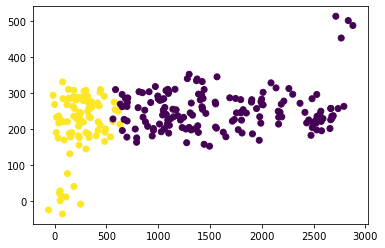

In [7]:
plt.scatter(x[:,0], x[:,1], c=y)

**Note:** The scales of the X & Y axis are very different

- StandardScaler -> (x - mean(x))/ square-root of variance
    - This way, you will get something that revolved around 0

In [11]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

**StandardScaler**

In [9]:
x_scaled = StandardScaler().fit_transform(x)

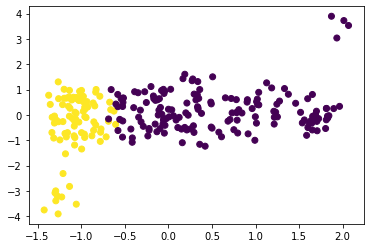

In [10]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y)

**Note:** The axis are much more similar to each other now than before <br>
- There are still outliers after applying this particular transformation

**Quantile Transformer**

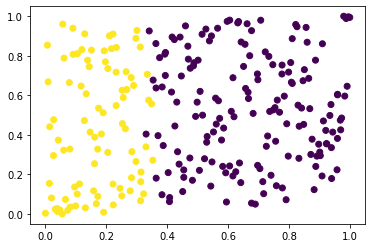

In [13]:
x_quantile = QuantileTransformer(n_quantiles = 100).fit_transform(x)
plt.scatter(x_quantile[:,0], x_quantile[:,1], c=y)

## Dataset 2

In [16]:
df2 = pd.read_csv('drawndata2.csv')
df2.head()

,x,y,z
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a
3,469.891398,368.371652,a
4,405.425622,403.141546,a


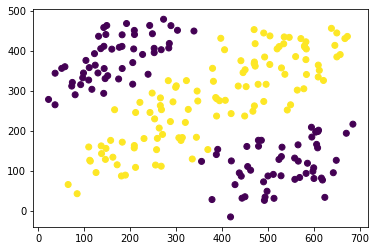

In [24]:
x2 = df2[['x','y']].values
y2 = df2['z'] =='a'
plt.scatter(x2[:,0], x2[:,1], c=y2)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

**Iteration 1**

In [38]:
pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

In [39]:
pred = pipe.fit(x2,y2).predict(x2)

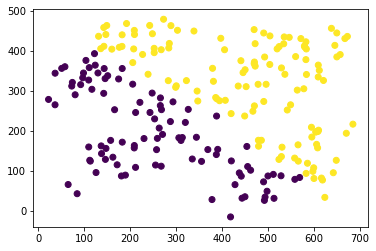

In [40]:
plt.scatter(x2[:,0], x2[:,1], c=pred)

**Iteration 2**

In [44]:
pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

In [45]:
pred = pipe.fit(x2,y2).predict(x2)

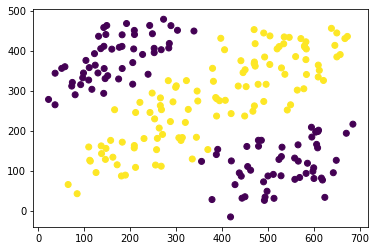

In [46]:
plt.scatter(x2[:,0], x2[:,1], c=pred)

In [47]:
poly = PolynomialFeatures()
poly_trans = poly.fit_transform(x2)

In [50]:
poly_trans.shape

(217, 6)

In [51]:
x2.shape

(217, 2)

## Categorical Data

In [53]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1,1)
print(arr)

[['low']
 ['low']
 ['high']
 ['medium']]


In [54]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
enc = OneHotEncoder(sparse=False)
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

- What if you ask the encoder to transform data it has never seen before?

In [58]:
enc.transform([["hello"]])

ValueError: Found unknown categories ['hello'] in column 0 during transform

In [59]:
enc = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [60]:
enc.transform([["hello"]])

array([[0., 0., 0.]])

Helpful link to generate data for practice: drawdata.xyz